<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_10_3_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create **normal distribution** data with a **mean of 3** and a **standard deviation of 1** for 100 and 10,000 sets of elements. Based on these artificially created sets, **compute the statistics** learned in the descriptive statistics module. Describe the differences between the statistics.

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical data analysis
from scipy import stats

# data preparation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# generating random numbers for sets of 100 (data_100) and 10000 elements (data_10k)
data_100 = np.sort(stats.norm.rvs(3, 1, 100)).round(2)
data_10k = np.sort(stats.norm.rvs(3, 1, 10000)).round(2)

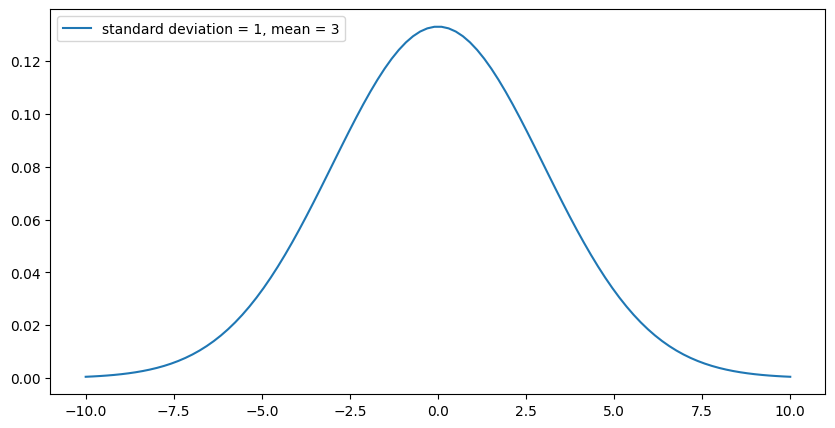

In [3]:
def gauss(x, sigma=1, mu=0):
  return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, gauss(x, sigma=3), label='standard deviation = 1, mean = 3')
plt.legend(loc='upper left')
plt.show()

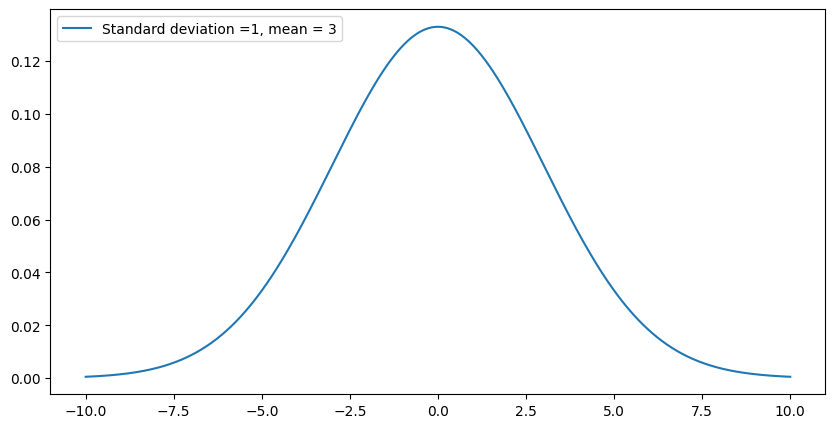

In [4]:
def gauss(x, sigma=1, mu=0):
  return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-10, 10, 10000)

plt.figure(figsize=(10, 5))
plt.plot(x, gauss(x, sigma=3), label='Standard deviation =1, mean = 3')
plt.legend(loc='upper left')
plt.show()

In [5]:
# calculation the mean value
mean_data_100 = np.round(np.mean(data_100), 2)
mean_data_10k = np.round(np.mean(data_10k), 2)
print(f'Mean value for the set of 100 elements is: {mean_data_100}')
print(f'Mean value for the set of 10.000 elements is: {mean_data_10k}')

Mean value for the set of 100 elements is: 3.14
Mean value for the set of 10.000 elements is: 2.99


In [6]:
# calculation the median value
median_data_100 = np.median(data_100)
median_data_10k = np.median(data_10k)
print(f'Median value for the set of 100 elements is: {median_data_100}')
print(f'Median value for the set of 10.000 elements is: {median_data_100}')

Median value for the set of 100 elements is: 3.0549999999999997
Median value for the set of 10.000 elements is: 3.0549999999999997


In [7]:
# calculation the moda value
mod_data_100 = stats.mode(data_100, keepdims=True)
mod_data_10k = stats.mode(data_10k, keepdims=True)
print(f'Mod value for the set of 100 elements is: {mod_data_100}')
print(f'Mod value for the set of 10.000 elements is: {mod_data_10k}')

Mod value for the set of 100 elements is: ModeResult(mode=array([2.57]), count=array([3]))
Mod value for the set of 10.000 elements is: ModeResult(mode=array([3.16]), count=array([51]))


We can see that mean of 100 elements set is slightly lower then median what suggests us we are dealing with negative skewness. While the 10000 elements set has the both mean and median equal. We can conclude that the more numerous the sample, the closer the distribution is to normal.

In [8]:
# calculation the quantiles
q0_100_set = np.quantile(data_100, 0.0)
q1_100_set = np.round(np.quantile(data_100, 0.25))
q3_100_set = np.round(np.quantile(data_100, 0.75))
q4_100_set = np.round(np.quantile(data_100, 1.0))

q0_10k_set = np.quantile(data_10k, 0.0)
q1_10k_set = np.round(np.quantile(data_10k, 0.25))
q3_10k_set = np.round(np.quantile(data_10k, 0.75))
q4_10k_set = np.round(np.quantile(data_10k, 1.0))

print(f'''Q0_data_100: {q0_100_set}
Q1_data_100: {q1_100_set}
Q2_data_100: {median_data_100}
Q3_data_100: {q3_100_set}
Q4_data_100: {q4_100_set}

Q0_data_10k: {q0_10k_set}
Q1_data_100: {q1_10k_set}
Q2_data_100: {median_data_10k}
Q3_data_100: {q3_10k_set}
Q4_data_100: {q4_10k_set}''')

Q0_data_100: 0.0
Q1_data_100: 3.0
Q2_data_100: 3.0549999999999997
Q3_data_100: 4.0
Q4_data_100: 5.0

Q0_data_10k: -0.61
Q1_data_100: 2.0
Q2_data_100: 2.99
Q3_data_100: 4.0
Q4_data_100: 7.0


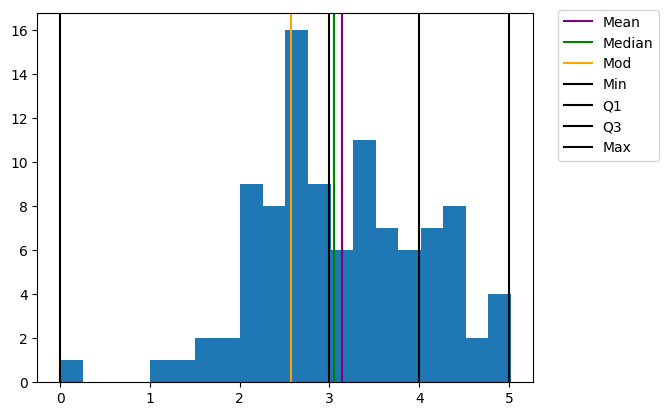

In [9]:
# histogtam for 100 elements set
plt.hist(data_100, bins=20)
plt.axvline(x = mean_data_100, color='purple', label = 'Mean')
plt.axvline(x = median_data_100, color='green', label = 'Median')
plt.axvline(x = mod_data_100[0], color='orange', label = 'Mod')
plt.axvline(x = q0_100_set, color='black', label = 'Min')
plt.axvline(x = q1_100_set, color='black', label = 'Q1')
plt.axvline(x = q3_100_set, color='black', label = 'Q3')
plt.axvline(x = q4_100_set, color='black', label = 'Max')
plt.legend(loc=(1.05, 0.6))
plt.show()

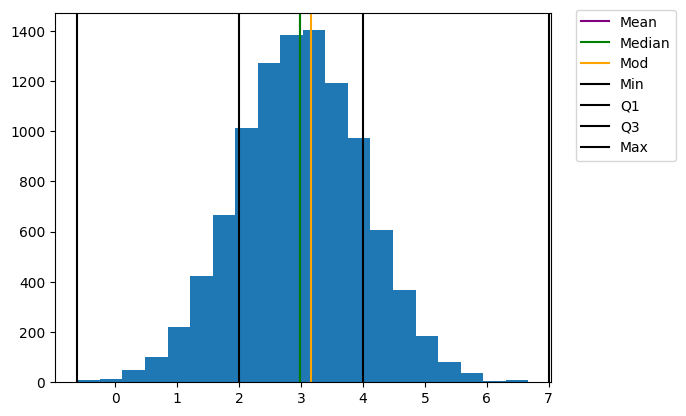

In [10]:
# histogtam for 10.000 elements set
plt.hist(data_10k, bins=20)
plt.axvline(x = mean_data_10k, color='purple', label = 'Mean')
plt.axvline(x = median_data_10k, color='green', label = 'Median')
plt.axvline(x = mod_data_10k[0], color='orange', label = 'Mod')
plt.axvline(x = q0_10k_set, color='black', label = 'Min')
plt.axvline(x = q1_10k_set, color='black', label = 'Q1')
plt.axvline(x = q3_10k_set, color='black', label = 'Q3')
plt.axvline(x = q4_10k_set, color='black', label = 'Max')
plt.legend(loc=(1.05, 0.6))
plt.show()

Observing the distribution on the histograms, we can clearly see that a larger sample size creates a normal distribution.

In [11]:
# distribution variability (dispersion)
dispersion_data_100 = np.round(max(data_100) - min(data_100), 2)
dispersion_data_10k = np.round(max(data_10k) - min(data_10k), 2)
print(f'In the 100 dataset, the data range is {dispersion_data_100}')
print(f'In the 10000 dataset, the data range is {dispersion_data_10k}')

In the 100 dataset, the data range is 5.02
In the 10000 dataset, the data range is 7.28


Within the datasets, a range of data increases for the larger sample.

In [12]:
# Inter Quartile Range (IQR)
iqr_data_100 = q3_100_set - q1_100_set
iqr_data_10k = q3_10k_set - q1_10k_set
print(f'IQR for 100 set is: {iqr_data_100}')
print(f'IQR for 10000 set is: {iqr_data_10k}')

IQR for 100 set is: 1.0
IQR for 10000 set is: 2.0


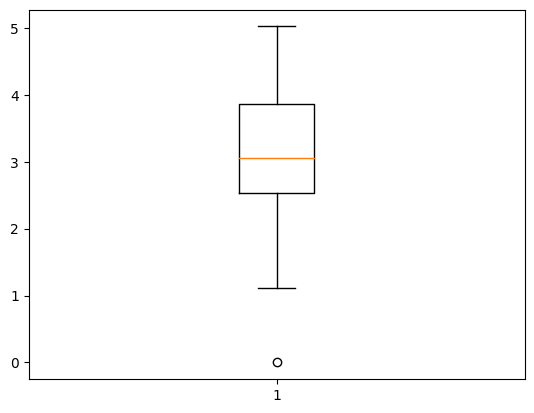

In [13]:
plt.boxplot(data_100)
plt.show()

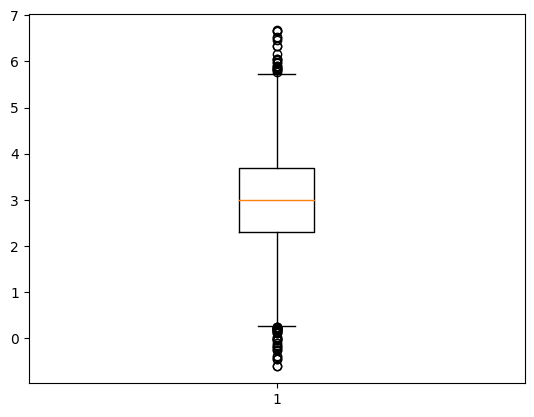

In [14]:
plt.boxplot(data_10k)
plt.show()

Boxplots illustrate that in a larger sample we are dealing with outliers, while in a smaller sample size we do not see this effect.

In [15]:
# variance
var_data_100 = np.round(np.var(data_100, ddof=1), 2)
var_data_10k = np.round(np.var(data_10k, ddof=1), 2)
print(f'Variance in 100 set: {var_data_100}')
print(f'Variance in 10000 set: {var_data_10k}')

Variance in 100 set: 0.87
Variance in 10000 set: 1.01


The variance shows us that there is not much of a difference between the numbers in the two sets.

In [16]:
# standard deviation
std_data_100 = np.round(np.std(data_100, ddof=1), 2)
std_data_10k = np.round(np.std(data_10k, ddof=1), 2)
print(f'standard deviation for 100 set: {std_data_100}')
print(f'standard deviation for 10000 set: {std_data_10k}')

standard deviation for 100 set: 0.93
standard deviation for 10000 set: 1.01


Standard deviation informs us about a small dispersion in data sets.

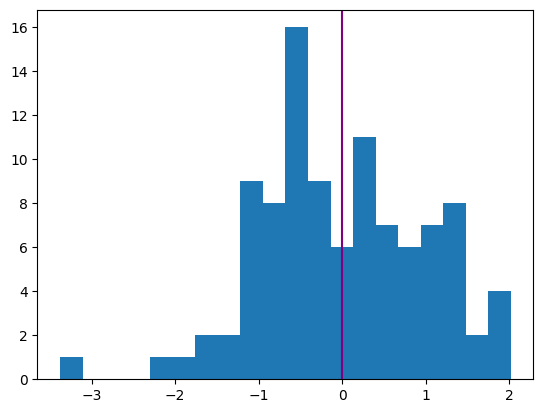

Mean: 3.6859404417555195e-16
Standard deviation: 1.005037815259212


In [17]:
# standardization - StandardScaler() - 100 set
scaler_standardized = StandardScaler()
standardized_data_100 = scaler_standardized.fit_transform(data_100.reshape(-1, 1))
plt.hist(standardized_data_100, bins=20)
plt.axvline(x = standardized_data_100.mean(), color='purple', label = 'Mean')
plt.show()
print(f'Mean: {standardized_data_100.mean()}')
print(f'Standard deviation: {np.std(standardized_data_100, ddof=1)}')

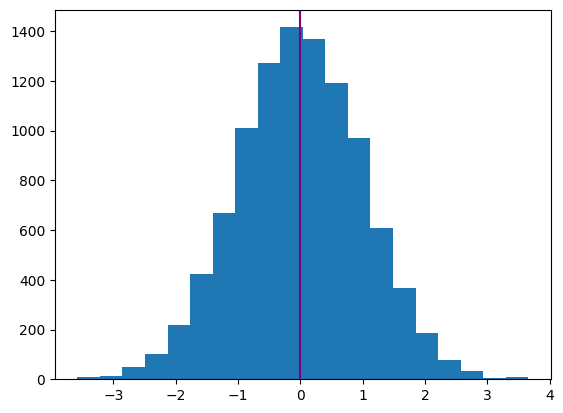

Mean: 1.3642420526593922e-16
Standard deviation: 1.0000500037503124


In [18]:
# standardization - StandardScaler() - 10000 set
scaler_standardized = StandardScaler()
standardized_data_10k = scaler_standardized.fit_transform(data_10k.reshape(-1, 1))
plt.hist(standardized_data_10k, bins=20)
plt.axvline(x = standardized_data_10k.mean(), color='purple', label = 'Mean')
plt.show()
print(f'Mean: {standardized_data_10k.mean()}')
print(f'Standard deviation: {np.std(standardized_data_10k, ddof=1)}')

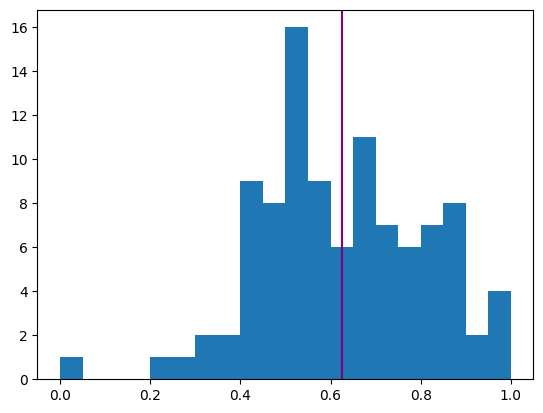

Mean: 0.6255378486055777
Standard deviation: 0.1861685784011349


In [19]:
# standardization - MinMax Scaler() - 100 set
scaler_MinMax = MinMaxScaler()
normalized_data_100 = scaler_MinMax.fit_transform(data_100.reshape(-1, 1))
plt.hist(normalized_data_100, bins=20)
plt.axvline(x = normalized_data_100.mean(), color='purple', label = 'Mean')
plt.show()
print(f'Mean: {normalized_data_100.mean()}')
print(f'Standard deviation: {np.std(normalized_data_100, ddof=1)}')

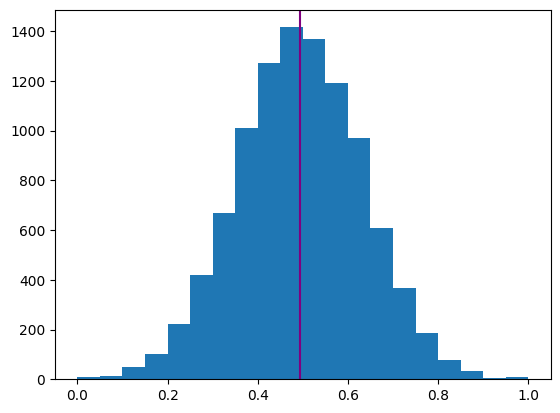

Mean: 0.49417129120879116
Standard deviation: 0.13823962704920859


In [20]:
# standardization - MinMax Scaler() - 10000 set
scaler_MinMax = MinMaxScaler()
normalized_data_10k = scaler_MinMax.fit_transform(data_10k.reshape(-1, 1))
plt.hist(normalized_data_10k, bins=20)
plt.axvline(x = normalized_data_10k.mean(), color='purple', label = 'Mean')
plt.show()
print(f'Mean: {normalized_data_10k.mean()}')
print(f'Standard deviation: {np.std(normalized_data_10k, ddof=1)}')

Standardization works better for large datasets.